# Analysis of Parameter Scan Results

For this parameter scan we have set $\omega=0.1$, and examined $K\in[1,1000]$ and $\Lambda\in[0.1,100]$. We calculate the free energy density separately, so we allow $\gamma$ to vary as well when needed. Below are a number of figures (some interactive) which explore the results.



## Index of Figures:

### Figure 1: 
Plots of $\psi$, $2\pi/\eta$, $\delta$, and $f$ vs $r$ with sliders for $K$, $\Lambda$, and $\gamma$.
### Figure 2: 
Plots of $\psi$, $\delta$, and $f'_{\gamma=0}$ vs $r$.
### Figure 3: 
$R_0$ as a function of $K$ and $\Lambda$.
### Figure 4: 
$R_C$, the radius at which fibrils have corneal surface twist ($\psi\approx0.31$), as a function of $K$ and $\Lambda$.
### Figure 5: 
$R_\text{max}$, the radius at which $f'_{\gamma=0}$ is maximized, as a function of $K$ and $\Lambda$.
### Figure 6: 
The asymptotic twist angle, $\psi_\infty$, as a function of $K$ and $\Lambda$.
### Figure 7: 
$\psi(R_0)$ vs $K$ and $\Lambda$.
### Figure 8:
The slope of the free energy density curve at $R_C$.
### Figure 9: 
The maximum of $f'_{\gamma=0}$ vs $K$ and $\Lambda$.
### Figure 10: 
The slope of the free energy density curve at $R_0$.
### Figure 11:
The location $R_\text{min}$ and magnitude $f(R_\text{min})$ of the local free energy minimum.
### Figure 12:
We examine the different contributions to the free energy density.

In [3]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar,minimize
import scipy.integrate as integrate
import matplotlib.gridspec as gridspec
from scipy.misc import derivative
from scipy.optimize import fsolve
import matplotlib.cm as cmap
from matplotlib.widgets import Slider, Button, RadioButtons

%matplotlib notebook


In [211]:
def F0(psi,gr,K):
    return gr - (1/2)*np.sin(2*psi) - K*np.tan(2*psi)*np.sin(psi)**2

def psi0function(gr,K):
    psilist=np.zeros(len(gr))

    for i in range(len(gr)):
        psilist[i] = fsolve(F0,psilist[i-1],args=(gr[i],K))
  
    return psilist

def CalculateFprime(gr,K,Lambda,omega,gamma,psi,deltalist,etalist):
    N=len(gr)

    fgamma = np.zeros(N)
    fK = np.zeros(N)
    fomega = np.zeros(N)
    fLambda = np.zeros(N)
    f = np.zeros(N)

    for i in range(N):
        if i==0:
            quadint2 = (gr[i])*(gr[i]*np.cos(psi[i])**2)/2
        else:
            quadint2 += (gr[i]-gr[i-1]) * (gr[i]*np.cos(psi[i])**2 + gr[i-1]*np.cos(psi[i-1])**2)/2

        fgamma[i] = gamma/gr[i]
        fK[i] = (1/2)*(np.sin(2*psi[i])/(2*gr[i]))**2 -(np.sin(2*psi[i])/(2*gr[i])) + (1/2)*K*((np.sin(psi[i])**4)/(gr[i]**2))

        if i==0:
            fomega[i] = omega * ( deltalist[i]**2 *(deltalist[i]**2 /2 -1)  )
        else:
            fomega[i] += omega * ( deltalist[i]**2 *(deltalist[i]**2 /2 -1)  + gr[i]*deltalist[i]*(deltalist[i]**2 -1)*(deltalist[i]-deltalist[i-1])/(gr[i]-gr[i-1]))
            fLambda[i] += Lambda * ( (1/2)*deltalist[i]**2 * (4*np.pi**2 - etalist[i]**2 * np.cos(psi[i])**2)**2  + 4*np.pi**2 * deltalist[i] * ((deltalist[i]-deltalist[i-1])/(gr[i]-gr[i-1]))*(2*np.pi**2 * gr[i] - etalist[i]**2 *(1/gr[i]) * quadint2)  )

        f[i] = fK[i] + fgamma[i] + fomega[i] + fLambda[i]
        
    fprime = np.zeros(N)
    for i in range(N):
        if i==0:
            fprime[i] = 0
        else:
            fprime[i] = (f[i]-f[i-1])/(gr[i]-gr[i-1])

    return fprime

def CalculateFreeEnergy(gr,K,Lambda,omega,gamma,psi,deltalist,etalist):
	N=len(gr)

	fgamma = np.zeros(N)
	fK = np.zeros(N)
	fomega = np.zeros(N)
	fLambda = np.zeros(N)
	f = np.zeros(N)

	for i in range(N):
		if i==0:
			quadint2 = (gr[i])*(gr[i]*np.cos(psi[i])**2)/2
		else:
			quadint2 += (gr[i]-gr[i-1]) * (gr[i]*np.cos(psi[i])**2 + gr[i-1]*np.cos(psi[i-1])**2)/2

		fgamma[i] = gamma/gr[i]
		fK[i] = (1/2)*(np.sin(2*psi[i])/(2*gr[i]))**2 -(np.sin(2*psi[i])/(2*gr[i])) + (1/2)*K*((np.sin(psi[i])**4)/(gr[i]**2))

		if i==0:
			fomega[i] = omega * ( deltalist[i]**2 *(deltalist[i]**2 /2 -1)  )
		else:
			fomega[i] += omega * ( deltalist[i]**2 *(deltalist[i]**2 /2 -1)  + gr[i]*deltalist[i]*(deltalist[i]**2 -1)*(deltalist[i]-deltalist[i-1])/(gr[i]-gr[i-1]))
			fLambda[i] += Lambda * ( (1/2)*deltalist[i]**2 * (4*np.pi**2 - etalist[i]**2 * np.cos(psi[i])**2)**2  + 4*np.pi**2 * deltalist[i] * ((deltalist[i]-deltalist[i-1])/(gr[i]-gr[i-1]))*(2*np.pi**2 * gr[i] - etalist[i]**2 *(1/gr[i]) * quadint2)  )

		f[i] = fK[i] + fgamma[i] + fomega[i] + fLambda[i]

	return f

def FreeEnergyComponents(gr,K,Lambda,omega,gamma,psi,deltalist,etalist):
    N=len(gr)

    fgamma = np.zeros(N)
    fK = np.zeros(N)
    fomega = np.zeros(N)
    fLambda = np.zeros(N)
    f = np.zeros(N)

    for i in range(N):
        if i==0:
            quadint2 = (gr[i])*(gr[i]*np.cos(psi[i])**2)/2
        else:
            quadint2 += (gr[i]-gr[i-1]) * (gr[i]*np.cos(psi[i])**2 + gr[i-1]*np.cos(psi[i-1])**2)/2

        fgamma[i] = gamma/gr[i]
        fK[i] = (1/2)*(np.sin(2*psi[i])/(2*gr[i]))**2 -(np.sin(2*psi[i])/(2*gr[i])) + (1/2)*K*((np.sin(psi[i])**4)/(gr[i]**2))

        if i==0:
            fomega[i] = omega * ( deltalist[i]**2 *(deltalist[i]**2 /2 -1)  )
        else:
            fomega[i] += omega * ( deltalist[i]**2 *(deltalist[i]**2 /2 -1)  + gr[i]*deltalist[i]*(deltalist[i]**2 -1)*(deltalist[i]-deltalist[i-1])/(gr[i]-gr[i-1]))
            fLambda[i] += Lambda * ( (1/2)*deltalist[i]**2 * (4*np.pi**2 - etalist[i]**2 * np.cos(psi[i])**2)**2  + 4*np.pi**2 * deltalist[i] * ((deltalist[i]-deltalist[i-1])/(gr[i]-gr[i-1]))*(2*np.pi**2 * gr[i] - etalist[i]**2 *(1/gr[i]) * quadint2)  )

        f[i] = fK[i] + fgamma[i] + fomega[i] + fLambda[i]

    return f,fK,fgamma,fomega,fLambda

def FreeEnergy_NoD(gr,K,psi,gamma):
    N=len(gr)

    fgamma = np.zeros(N)
    fK = np.zeros(N)
    
    fgamma = gamma/gr
    for i in range(N):
        fK[i] = (1/2)*(np.sin(2*psi[i])/(2*gr[i]))**2 -(np.sin(2*psi[i])/(2*gr[i])) + (1/2)*K*((np.sin(psi[i])**4)/(gr[i]**2))
    f = fgamma + fK
    
    return f



## Figure 1
Here we show all collected data, with sliders to manually go through all $K$ and $\Lambda$ values.

<IPython.core.display.Javascript object>


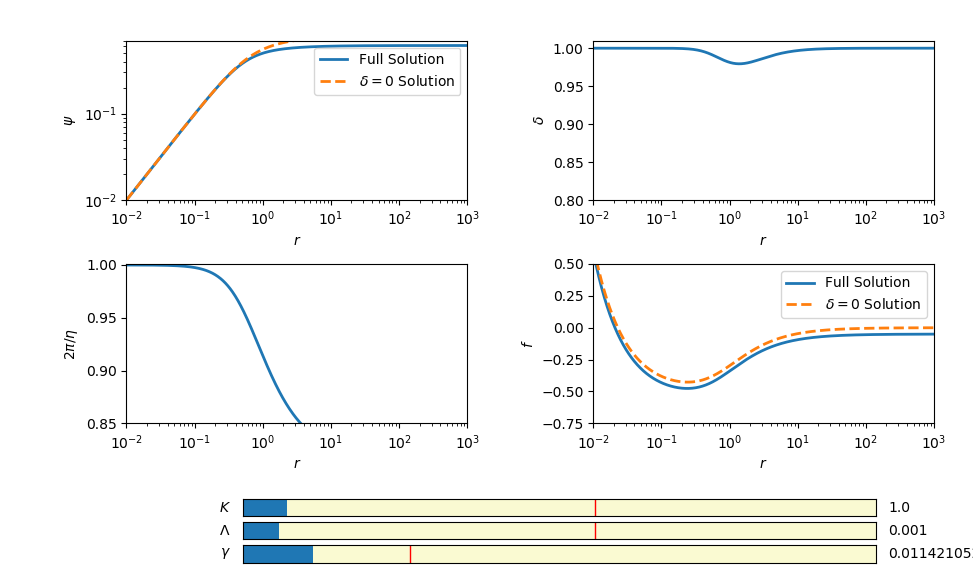

In [184]:
fig=plt.figure()
gs=gridspec.GridSpec(2,2,width_ratios=[1,1],height_ratios=[1,1],wspace =0.37,top=0.93,bottom=0.27,left=0.13,right=0.96,hspace=0.4)

ax1=plt.subplot(gs[0])
ax2=plt.subplot(gs[1])
ax3=plt.subplot(gs[2])
ax4=plt.subplot(gs[3])

logorlinscale='log'

ax1.set_xlabel('$r$')
ax1.set_ylabel('$\psi$')
ax1.set_xscale(logorlinscale)
ax1.set_yscale(logorlinscale)
#ax1.set_title('$\gamma=0.01$, $\omega=0.1$',fontsize=18)
ax1.set_ylim(0.01,0.7)

ax2.set_xscale(logorlinscale)
ax2.set_ylabel('$\delta$')
ax2.set_xlabel('$r$')
ax2.set_ylim(0.8,1.01)

ax3.set_xscale(logorlinscale)
ax3.set_ylabel('$2\pi/\eta$')
ax3.set_xlabel('$r$')
ax3.set_ylim(0.85,1.001)

ax4.set_xscale(logorlinscale)
ax4.set_ylabel('$f$')
ax4.set_xlabel('$r$')
ax4.set_ylim(-0.75,0.5)
#ax4.set_yscale('symlog')


omega = 0.1
gamma0 = 5
Lambda0 = 5
K0 = 5

n=10
Lambdalist = np.logspace(-3,2,num=n)
Klist = np.logspace(0,3,num=n)
m=20
gammalist = np.linspace(0.001,0.1,num=m)#np.logspace(-3,0,num=m)


psi0 = np.loadtxt('Psi_'+str(K0)+'_'+str(Lambda0)+'.csv')

N0=len(psi0)
gr = np.logspace(-2,3,num=N0)
psi_noD = psi0function(gr,Klist[K0])

l, = ax1.plot(gr, psi0, lw=2,label='Full Solution')
o, = ax1.plot(gr,psi_noD,lw=2,label='$\delta=0$ Solution',linestyle='--')
ax1.margins(x=0)
ax1.legend(loc='best')

delta0 = np.loadtxt('Delta_'+str(K0)+'_'+str(Lambda0)+'.csv')
j, = ax2.plot(gr, delta0, lw=2)
ax2.margins(x=0)

eta0 = np.loadtxt('Eta_'+str(K0)+'_'+str(Lambda0)+'.csv')
k, = ax3.plot(gr, 2*np.pi/eta0, lw=2)
ax3.margins(x=0)

f0 = CalculateFreeEnergy(gr,Klist[K0],Lambdalist[Lambda0],omega,gammalist[gamma0],psi0,delta0,eta0)
f_noD = FreeEnergy_NoD(gr,Klist[K0],psi_noD,gammalist[gamma0])
h, = ax4.plot(gr, f0, lw=2,label='Full Solution')
p, = ax4.plot(gr,f_noD,lw=2,label='$\delta=0$ Solution',linestyle='--')
ax4.margins(x=0)
ax4.legend(loc='best')

'''cospsi0 = np.cos(psi0)
m, = ax3.plot(gr,cospsi0,lw=2,linestyle='--',label='$\cos(\psi)$')
ax3.legend(loc='best')'''



axcolor = 'lightgoldenrodyellow'
axK = plt.axes([0.25, 0.11, 0.65, 0.03], facecolor=axcolor)
axLambda = plt.axes([0.25, 0.07, 0.65, 0.03], facecolor=axcolor)
axGamma = plt.axes([0.25, 0.03, 0.65, 0.03], facecolor=axcolor)

sK = Slider(axK, '$K$', 0, n-1, valinit=K0)
sLambda = Slider(axLambda, '$\Lambda$', 0, n-1, valinit=Lambda0)
sGamma = Slider(axGamma, '$\gamma$', 0, m-1, valinit=gamma0)


def update(val):
    Lambda = int(sLambda.val)
    sLambda.valtext.set_text(Lambdalist[Lambda])
    K = int(sK.val)
    sK.valtext.set_text(Klist[K])
    gamma = int(sGamma.val)
    sGamma.valtext.set_text(gammalist[gamma])

    psi = np.loadtxt('Psi_'+str(K)+'_'+str(Lambda)+'.csv')
    l.set_ydata(psi)
    
    psi_noD = psi0function(gr,Klist[K])
    o.set_ydata(psi_noD)

    delta = np.loadtxt('Delta_'+str(K)+'_'+str(Lambda)+'.csv')
    j.set_ydata(delta)

    eta = np.loadtxt('Eta_'+str(K)+'_'+str(Lambda)+'.csv')
    k.set_ydata(2*np.pi/eta)

    f = CalculateFreeEnergy(gr,Klist[K],Lambdalist[Lambda],omega,gammalist[gamma],psi,delta,eta)
    f_noD = FreeEnergy_NoD(gr,Klist[K],psi_noD,gammalist[gamma])
    h.set_ydata(f)
    p.set_ydata(f_noD)
    
    #m.set_ydata(np.cos(psi))

    fig.canvas.draw_idle()


sLambda.on_changed(update)
sK.on_changed(update)
sGamma.on_changed(update)

plt.show()

## Figure 2:
Here we plot $\psi$, $\delta$, and $f'_{\gamma=0}$ vs $r$. Interestingly, we note that the maximum in $f'_{\gamma=0}$ is in general not located at $R_0$.

<IPython.core.display.Javascript object>


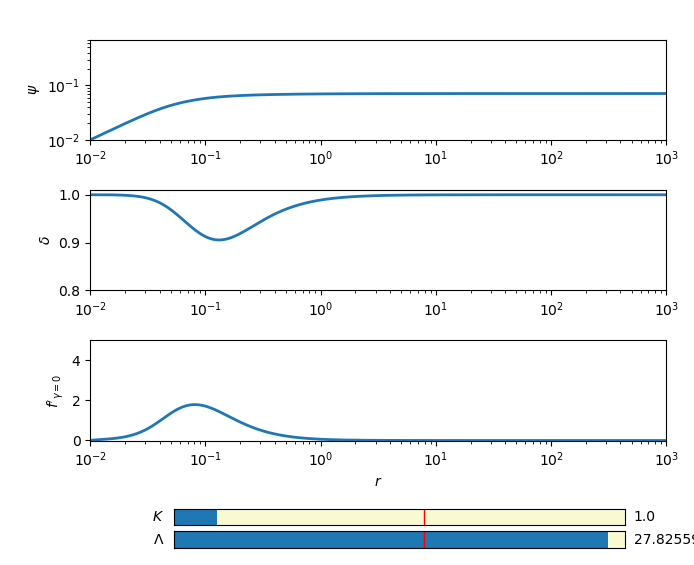

In [214]:
fig=plt.figure()
gs=gridspec.GridSpec(3,1,width_ratios=[1],height_ratios=[1,1,1],wspace =0.37,top=0.93,bottom=0.22,left=0.13,right=0.96,hspace=0.5)

ax1=plt.subplot(gs[0])
ax2=plt.subplot(gs[1])
ax3=plt.subplot(gs[2])

logorlinscale='log'

#ax1.set_xlabel('$r$')
ax1.set_ylabel('$\psi$')
ax1.set_xscale(logorlinscale)
ax1.set_yscale(logorlinscale)
ax1.set_ylim(0.01,0.7)

ax2.set_xscale(logorlinscale)
ax2.set_ylabel('$\delta$')
#ax2.set_xlabel('$r$')
ax2.set_ylim(0.8,1.01)

ax3.set_xscale(logorlinscale)
ax3.set_ylabel("$f'_{\gamma=0}$")
ax3.set_xlabel('$r$')
ax3.set_ylim(-0.01,5)


omega = 0.1
Lambda0 = 5
K0 = 5

n=10
Lambdalist = np.logspace(-3,2,num=n)
Klist = np.logspace(0,3,num=n)

psi0 = np.loadtxt('Psi_'+str(K0)+'_'+str(Lambda0)+'.csv')
eta0 = np.loadtxt('Eta_'+str(K0)+'_'+str(Lambda0)+'.csv')
delta0 = np.loadtxt('Delta_'+str(K0)+'_'+str(Lambda0)+'.csv')

N0=len(psi0)
gr = np.logspace(-2,3,num=N0)

l, = ax1.plot(gr, psi0, lw=2)
ax1.margins(x=0)

j, = ax2.plot(gr, delta0, lw=2)
ax2.margins(x=0)

fprime = CalculateFprime(gr,Klist[K0],Lambdalist[Lambda0],omega,0,psi0,delta0,eta0)
k, = ax3.plot(gr, fprime, lw=2)
ax3.margins(x=0)


axcolor = 'lightgoldenrodyellow'
axK = plt.axes([0.25, 0.07, 0.65, 0.03], facecolor=axcolor)
axLambda = plt.axes([0.25, 0.03, 0.65, 0.03], facecolor=axcolor)

sK = Slider(axK, '$K$', 0, n-1, valinit=K0)
sLambda = Slider(axLambda, '$\Lambda$', 0, n-1, valinit=Lambda0)


def update(val):
    Lambda = int(sLambda.val)
    sLambda.valtext.set_text(Lambdalist[Lambda])
    K = int(sK.val)
    sK.valtext.set_text(Klist[K])

    psi = np.loadtxt('Psi_'+str(K)+'_'+str(Lambda)+'.csv')
    l.set_ydata(psi)
    
    psi_noD = psi0function(gr,Klist[K])
    o.set_ydata(psi_noD)

    delta = np.loadtxt('Delta_'+str(K)+'_'+str(Lambda)+'.csv')
    j.set_ydata(delta)

    eta = np.loadtxt('Eta_'+str(K)+'_'+str(Lambda)+'.csv')
    fprime = CalculateFprime(gr,Klist[K],Lambdalist[Lambda],omega,0,psi,delta,eta)
    k.set_ydata(fprime)
    
    fig.canvas.draw_idle()


sLambda.on_changed(update)
sK.on_changed(update)

plt.show()

## Data Analysis:

In [213]:
N=1000
n=10

Klist=np.logspace(0,3,num=n)
Lambdalist=np.logspace(-3,2,num=n)

r0 = np.zeros((n,n))
finaltwist = np.zeros((n,n))
r0twist = np.zeros((n,n))
fprime_max = np.zeros((n,n))
psi_rmax = np.zeros((n,n))
R_C = np.zeros((n,n))
fprime_r0 = np.zeros((n,n))
rmax= np.zeros((n,n))
fprime_rc = np.zeros((n,n))
fprimemax_restricted = np.zeros((n,n))
rmax_restricted = np.zeros((n,n))
psirmax_restricted = np.zeros((n,n))

minloc = np.zeros((n,n))
minmag = np.zeros((n,n))
maxloc = np.zeros((n,n))
maxmag = np.zeros((n,n))

test = np.zeros((n,n))

for j in range(n):
    for i in range(n):
        test[i,j] = np.sqrt(Klist[j]/Lambdalist[i] - 1/(3*Lambdalist[i]))/(4*np.pi**2)
        deltalist = np.loadtxt('Delta_'+str(j)+'_'+str(i)+'.csv')
        etalist = np.loadtxt('Eta_'+str(j)+'_'+str(i)+'.csv')
        psi = np.loadtxt('Psi_'+str(j)+'_'+str(i)+'.csv')
        
        gr = np.logspace(-2,3,num=len(psi))
        fprime = CalculateFprime(gr,Klist[j],Lambdalist[i],0.1,0.01,psi,deltalist,etalist)
        f = CalculateFreeEnergy(gr,Klist[j],Lambdalist[i],0.1,0.01,psi,deltalist,etalist)
        
        d0 = min(deltalist)
        r0loc = np.where(deltalist==d0)[0][0]
        rmaxloc = np.where(fprime==max(fprime))[0][0]
        
        biggerthancornea = np.where(psi>=0.31)[0]
        if len(biggerthancornea)>0:
            R_C[i,j] = gr[min(biggerthancornea)]
            fprime_rc[i,j] = fprime[min(biggerthancornea)]
        else:
            R_C[i,j] = np.NaN
            fprime_rc[i,j] = np.NaN
        
        if np.where(psi == max(psi))[0][0]<len(psi)-1:
            r0[i,j] = np.NaN
            finaltwist[i,j]=np.NaN
            r0twist[i,j]=np.NaN
            fprime_max[i,j] = np.NaN
            psi_rmax[i,j]=np.NaN
            fprime_r0[i,j] = np.NaN
            rmax[i,j] = np.NaN
        else:
            r0[i,j] = gr[r0loc]
            finaltwist[i,j] = psi[-1]
            r0twist[i,j] = psi[r0loc]
            fprime_max[i,j] = max(fprime)
            psi_rmax[i,j] = psi[rmaxloc]
            fprime_r0[i,j] = fprime[r0loc]
            rmax[i,j] = gr[rmaxloc]
            
        for k in range(N):
            if f[k]<-0.22:
                fprime[k]=0
            fprimemax_restricted[i,j] = max(fprime)
            rmax_restricted[i,j] = gr[np.where(fprime==max(fprime))[0][0]]
            psirmax_restricted[i,j] = psi[np.where(fprime==max(fprime))[0][0]]
        
        oldf=f[0]
        count=0
        for k in range(N):
            if f[k]>oldf and count==0:
                minloc[i,j] = gr[k-1]
                minmag[i,j] = oldf
                count+=1
            if f[k]<oldf and count==1:
                    maxloc[i,j] = gr[k-1]
                    maxmag[i,j] = oldf
                    count+=1
            oldf = f[k]
            
        if minloc[i,j] ==0 or not r0[i,j]>0:
            minloc[i,j] = np.NaN
            minmag[i,j] = np.NaN
            maxloc[i,j] = np.NaN
            maxmag[i,j] = np.NaN
        
r0[2,0] = 0.8
finaltwist[2,0] = 0.42

## Figure 3
Here we show the dimensionless radial coordinate of the global minimum of the D-Band amplitude, which we call $R_0$.

<IPython.core.display.Javascript object>


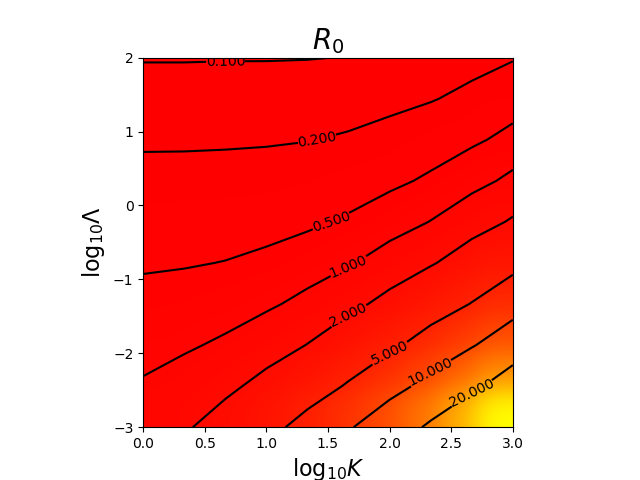

In [153]:
plt.imshow(r0,cmap=cmap.autumn,origin='lower',extent=[0,3,-3,2],aspect=3/5,interpolation='gaussian')
plt.xlabel('$\log_{10} K$',fontsize=16)
plt.ylabel('$\log_{10}\Lambda$',fontsize=16)
plt.title('$R_0$',fontsize=20)

CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),r0,[0.1,0.2,0.5,1,2,5,10,20],colors='k')
plt.clabel(CS, inline=1, fontsize=10)

plt.show()


## Figure 4
Here we show the dimensionless radial coordinate at which $\psi = 0.31$ (corneal surface twist), if it exists.


<IPython.core.display.Javascript object>


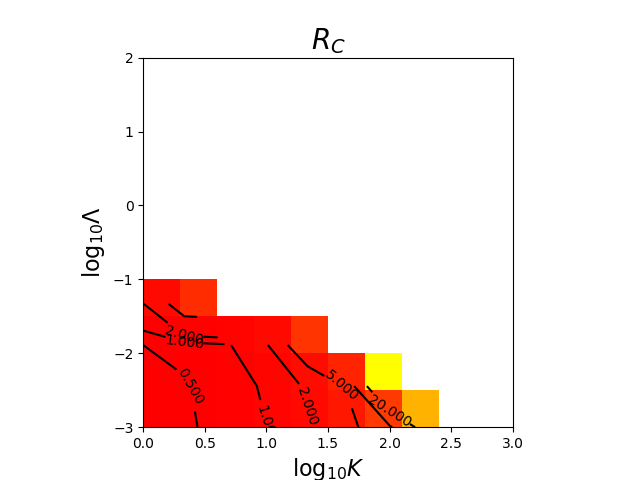

In [155]:
R_C[2,0] = 0.5#np.NaN#(R_C[3,0]+R_C[1,0])/4
plt.imshow(R_C,cmap=cmap.autumn,origin='lower',extent=[0,3,-3,2],aspect=3/5)#,interpolation='gaussian')
plt.xlabel('$\log_{10} K$',fontsize=16)
plt.ylabel('$\log_{10}\Lambda$',fontsize=16)
plt.title('$R_C$',fontsize=20)

CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),R_C,[0.1,0.2,0.5,1,2,5,10,20],colors='k')
plt.clabel(CS, inline=1, fontsize=10)

plt.show()


## Figure 5
$R_\text{max}$, the radius at which $f'_{\gamma=0}$ is maximized.

<IPython.core.display.Javascript object>


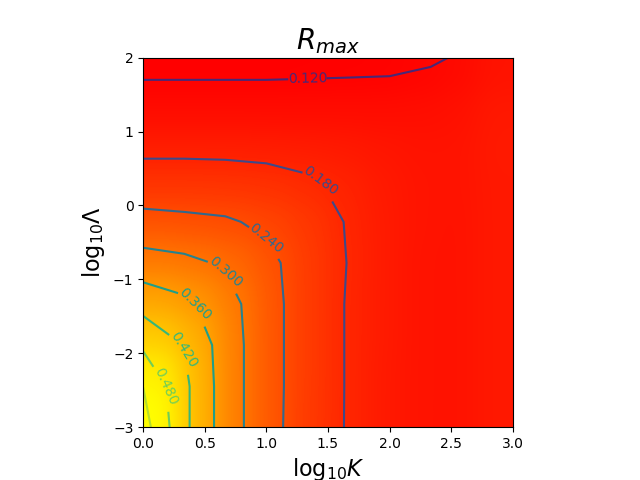

In [198]:
rmax[2,0] = (rmax[3,0]+rmax[1,0])/2
plt.imshow(rmax,cmap=cmap.autumn,origin='lower',extent=[0,3,-3,2],aspect=3/5,interpolation='gaussian')
plt.xlabel('$\log_{10} K$',fontsize=16)
plt.ylabel('$\log_{10}\Lambda$',fontsize=16)
plt.title('$R_{max}$',fontsize=20)

CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),rmax)#,[0.1,0.2,0.5,1,2,5,10,20],colors='k')
plt.clabel(CS, inline=1, fontsize=10)

plt.show()


<IPython.core.display.Javascript object>


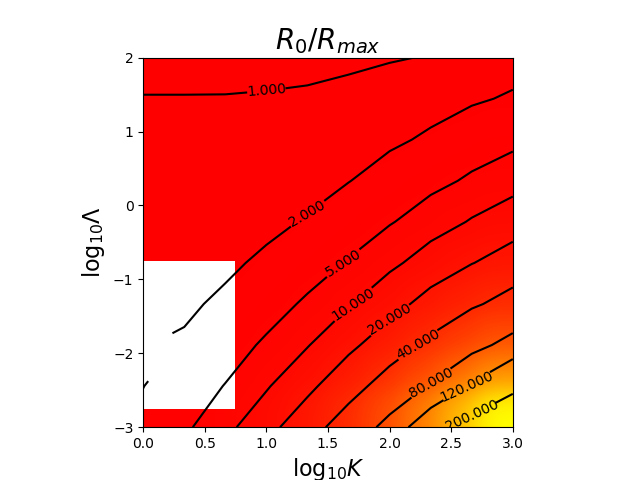

In [218]:

plt.imshow(r0/rmax,cmap=cmap.autumn,origin='lower',extent=[0,3,-3,2],aspect=3/5,interpolation='gaussian')
plt.xlabel('$\log_{10} K$',fontsize=16)
plt.ylabel('$\log_{10}\Lambda$',fontsize=16)
plt.title('$R_0/R_{max}$',fontsize=20)

CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),r0/rmax,[1,2,5,10,20,40,80,120,200],colors='k')
plt.clabel(CS, inline=1, fontsize=10)

plt.show()

## Figure 6
The asymptotic twist angle as $r\to\infty$. Interestingly, we note by comparing with Fig 2 that $\psi_\infty$ is unrelated to $R_0$.

<IPython.core.display.Javascript object>


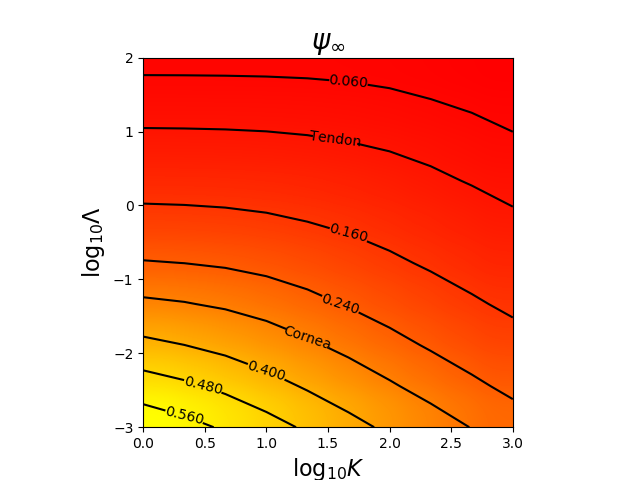

In [199]:
plt.imshow(finaltwist,cmap=cmap.autumn,origin='lower',extent=[0,3,-3,2],aspect=3/5,interpolation='gaussian')
plt.xlabel('$\log_{10} K$',fontsize=16)
plt.ylabel('$\log_{10}\Lambda$',fontsize=16)
plt.title('$\psi_\infty$',fontsize=20)

CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),finaltwist,[0.06,0.16,0.24,0.4,0.48,0.56],colors='k')
plt.clabel(CS, inline=1, fontsize=10)

CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),finaltwist,[0.09],colors='k')
plt.clabel(CS,fmt='Tendon', inline=1, fontsize=10)

CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),finaltwist,[0.31],colors='k')
plt.clabel(CS,fmt='Cornea', inline=1, fontsize=10)

plt.show()

## Figure 7
The twist angle at $R_0$.

<IPython.core.display.Javascript object>


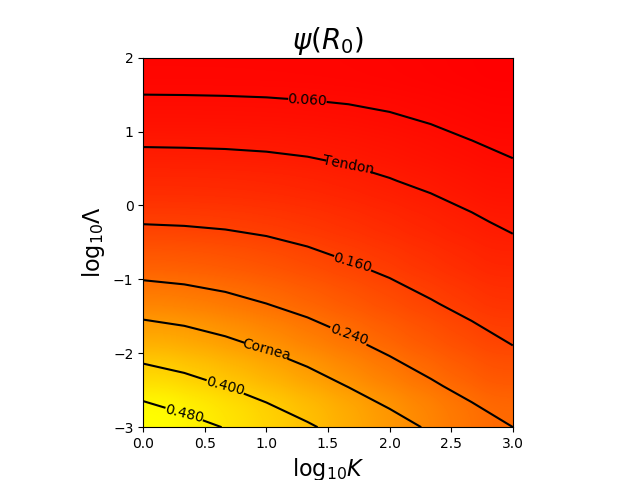

In [11]:
r0twist[2,0] = 0.36
plt.imshow(r0twist,cmap=cmap.autumn,origin='lower',extent=[0,3,-3,2],aspect=3/5,interpolation='gaussian')
plt.xlabel('$\log_{10} K$',fontsize=16)
plt.ylabel('$\log_{10}\Lambda$',fontsize=16)
plt.title('$\psi(R_0)$',fontsize=20)

CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),r0twist,[0.06,0.16,0.24,0.4,0.48,0.56],colors='k')
plt.clabel(CS, inline=1, fontsize=10)

CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),r0twist,[0.09],colors='k')
plt.clabel(CS,fmt='Tendon', inline=1, fontsize=10)

CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),r0twist,[0.31],colors='k')
plt.clabel(CS,fmt='Cornea', inline=1, fontsize=10)

plt.show()

## Figure 8
The slope of the free energy density curve at $R_C$.

<IPython.core.display.Javascript object>


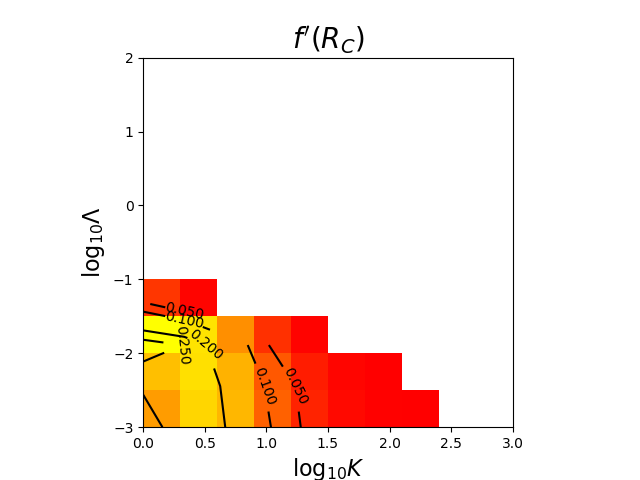

In [200]:
plt.imshow(fprime_rc,cmap=cmap.autumn,origin='lower',extent=[0,3,-3,2],aspect=3/5)#,interpolation='gaussian')
plt.xlabel('$\log_{10} K$',fontsize=16)
plt.ylabel('$\log_{10}\Lambda$',fontsize=16)
plt.title("$f'(R_C)$",fontsize=20)

CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),fprime_rc,[0.05,0.1,0.2,0.25,0.3],colors='k')
plt.clabel(CS, inline=1, fontsize=10)

plt.show()

## Figure 9
The maximum slope of the free energy density curve. We also show contour lines for where this maximum free energy slope corresponds to tendon and corneal surface twists.

<IPython.core.display.Javascript object>


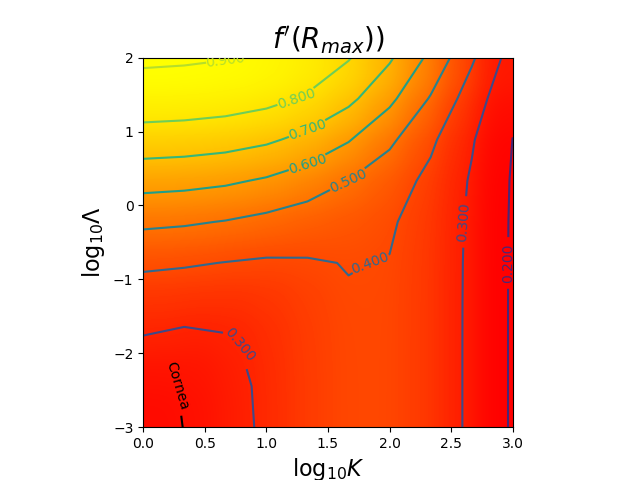

In [220]:
fprime_max[2,0] = (fprime_max[3,0]+fprime_max[1,0])/2
plt.imshow(fprime_max,cmap=cmap.autumn,origin='lower',extent=[0,3,-3,2],aspect=3/5,interpolation='gaussian')
plt.xlabel('$\log_{10} K$',fontsize=16)
plt.ylabel('$\log_{10}\Lambda$',fontsize=16)
plt.title("$f'(R_{max})$)",fontsize=20)

CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),fprime_max)#,[-1.5,-1,-0.5,-0.2,-0.1,-0.01],colors='k')
plt.clabel(CS, inline=1, fontsize=10)

CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),psi_rmax,[0.31],colors='k')
plt.clabel(CS,fmt='Cornea', inline=1, fontsize=10)
#CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),psi_rmax,[0.09],colors='k')
#plt.clabel(CS,fmt='Tendon', inline=1, fontsize=10)

plt.show()

## Figure 10
The slope of the free energy density curve at $R_0$.

<IPython.core.display.Javascript object>


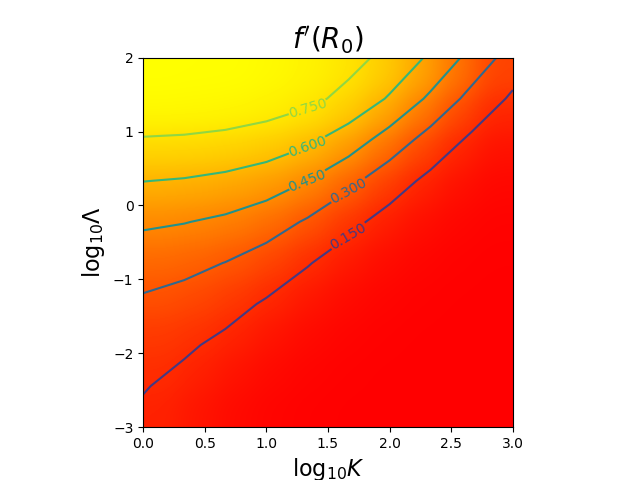

In [203]:
fprime_r0[2,0] = 0.2
plt.imshow(fprime_r0,cmap=cmap.autumn,origin='lower',extent=[0,3,-3,2],aspect=3/5,interpolation='gaussian')
plt.xlabel('$\log_{10} K$',fontsize=16)
plt.ylabel('$\log_{10}\Lambda$',fontsize=16)
plt.title("$f'(R_0)$",fontsize=20)

CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),fprime_r0)#,[-1.5,-1,-0.5,-0.2,-0.1,-0.01],colors='k')
plt.clabel(CS, inline=1, fontsize=10)

plt.show()

## Figure 11:
The location $R_\text{min}$ and magnitude $f(R_\text{min})$ of the local free energy minimum, if it exists. We take $\gamma=0.01$.

<IPython.core.display.Javascript object>


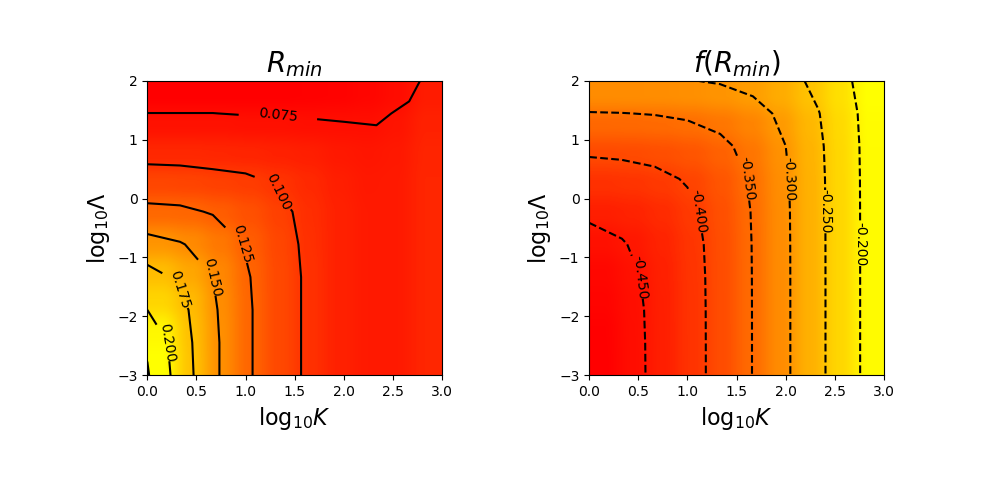

In [169]:
minloc[2,0]=0.2
minmag[2,0] = (minmag[3,0]+minmag[1,0])/2

fig=plt.figure()
gs=gridspec.GridSpec(1,2,width_ratios=[1,1],height_ratios=[1],wspace=0.5,bottom=0.1,top=0.95,right=0.9,left=0.15)

ax1=plt.subplot(gs[0])
ax2=plt.subplot(gs[1])

ax1.imshow(minloc,cmap=cmap.autumn,origin='lower',extent=[0,3,-3,2],aspect=3/5,interpolation='hermite')
ax1.set_xlabel('$\log_{10} K$',fontsize=16)
ax1.set_ylabel('$\log_{10}\Lambda$',fontsize=16)
ax1.set_title('$R_{min}$',fontsize=20)

CS = ax1.contour(np.log10(Klist),np.log10(Lambdalist),minloc,colors='k')
ax1.clabel(CS, inline=1, fontsize=10)

ax2.imshow(minmag,cmap=cmap.autumn,origin='lower',extent=[0,3,-3,2],aspect=3/5,interpolation='hermite')
ax2.set_xlabel('$\log_{10} K$',fontsize=16)
ax2.set_ylabel('$\log_{10}\Lambda$',fontsize=16)
ax2.set_title('$f(R_{min})$',fontsize=20)

CS = ax2.contour(np.log10(Klist),np.log10(Lambdalist),minmag,colors='k')
ax2.clabel(CS, inline=1, fontsize=10)

plt.show()

## Figure 12:

The free energy density during fibril growth is made up of four key terms:
\begin{equation}
f(r) = f_\gamma(r) + f_K(r) + f_\omega(r) + f_\Lambda(r).
\end{equation}

These terms can be written (in dimensionless form) as follows:
\begin{equation}
f_\gamma(r) = \gamma/r,
\end{equation}
\begin{equation}
f_K(r) = \frac{1}{2}K\frac{\sin^4\psi}{r^2} + \frac{1}{2}\left(\frac{\sin(2\psi)}{2r}\right)^2 - \frac{\sin(2\psi)}{2r},
\end{equation}
\begin{equation}
f_\omega(r) = \omega\left[ \delta^2\left(\frac{\delta^2}{2}-1\right) + r\delta\delta'\left(\delta^2-1\right)\right] \approx -\frac{1}{2}\omega ,
\end{equation}
\begin{equation}
f_\Lambda(r) = \Lambda \left[ \frac{\delta^2}{2}\left(4\pi^2 - \eta^2\cos^2\psi\right)^2 
 + 4\pi^2\delta\delta'\left(2\pi^2 r - \eta^2\frac{1}{r}\int_0^r x\cos^2\big(\psi(x)\big)dx\right)\right] \approx 0 \text{ (as long as }2\pi/\eta\approx\cos(\psi)\text{)} .
\end{equation}

In the following figure we show how these different free energy terms, as well as the full free energy, vary with our dimensionless model parameters.

<IPython.core.display.Javascript object>


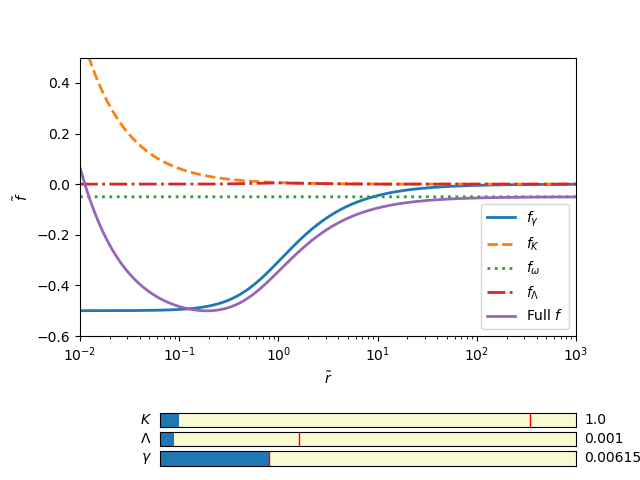

In [222]:
fig, ax = plt.subplots()

Lambda0 = 3
K0 = 8
gamma0 = 5
omega=0.1

n=10
m=20
Lambdalist = np.logspace(-3,2,num=n)
Klist = np.logspace(0,3,num=n)
gammalist = np.logspace(-3,0,num=m)

gr = np.logspace(-2,3,num=1000)

psi = np.loadtxt('Psi_'+str(K0)+'_'+str(Lambda0)+'.csv')
deltalist = np.loadtxt('Delta_'+str(K0)+'_'+str(Lambda0)+'.csv')
etalist = np.loadtxt('Eta_'+str(K0)+'_'+str(Lambda0)+'.csv')
fullf,fgamma,fK,fomega,fLambda = FreeEnergyComponents(gr,Klist[K0],Lambdalist[Lambda0],omega,gammalist[gamma0],psi,deltalist,etalist)

i, = plt.plot(gr,fgamma, lw=2,label='$f_\gamma$')
j, = plt.plot(gr,fK, lw=2,label='$f_K$',linestyle='--')
k, = plt.plot(gr,fomega, lw=2,label='$f_\omega$',linestyle=':')
h, = plt.plot(gr,fLambda, lw=2,label='$f_\Lambda$',linestyle='-.')
o, = plt.plot(gr,fullf,lw=2,label='Full $f$')

plt.ylim(-0.6,0.5)
plt.xscale('log')
plt.ylabel('$\\tilde{f}$')
plt.xlabel('$\\tilde{r}$')
plt.legend(loc='best')
plt.subplots_adjust(bottom=0.3)
plt.xlim(0.01,1000)


axcolor = 'lightgoldenrodyellow'
axK = plt.axes([0.25, 0.11, 0.65, 0.03], facecolor=axcolor)
axLambda = plt.axes([0.25, 0.07, 0.65, 0.03], facecolor=axcolor)
axGamma = plt.axes([0.25, 0.03, 0.65, 0.03], facecolor=axcolor)

sK = Slider(axK, '$K$', 0, n-1, valinit=K0)
sLambda = Slider(axLambda, '$\Lambda$', 0, n-1, valinit=Lambda0)
sGamma = Slider(axGamma, '$\gamma$', 0, m-1, valinit=gamma0)


def update(val):
    Lambda = int(sLambda.val)
    sLambda.valtext.set_text(Lambdalist[Lambda])
    K = int(sK.val)
    sK.valtext.set_text(Klist[K])
    gamma = int(sGamma.val)
    sGamma.valtext.set_text(gammalist[gamma])

    
    psi = np.loadtxt('Psi_'+str(K)+'_'+str(Lambda)+'.csv')
    deltalist = np.loadtxt('Delta_'+str(K)+'_'+str(Lambda)+'.csv')
    etalist = np.loadtxt('Eta_'+str(K)+'_'+str(Lambda)+'.csv')
    fullf,fgamma,fK,fomega,fLambda = FreeEnergyComponents(gr,Klist[K],Lambdalist[Lambda],omega,gammalist[gamma],psi,deltalist,etalist)
    
    i.set_ydata(fgamma)
    j.set_ydata(fK)
    k.set_ydata(fomega)
    h.set_ydata(fLambda)
    o.set_ydata(fullf)
    
    fig.canvas.draw_idle()


sLambda.on_changed(update)
sK.on_changed(update)
sGamma.on_changed(update)

plt.show()

## Figure 13
We have shown before that the dimensionless chemical potential density is likely bounded below by $\mu\geq-0.22$. Here we show the maximum of $f'$ given the restriction that $f\geq-0.22$.

<IPython.core.display.Javascript object>


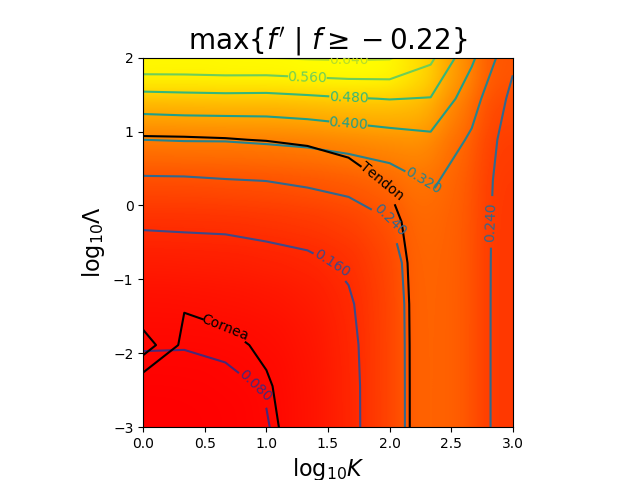

In [209]:
fprimemax_restricted[2,0] = (fprimemax_restricted[3,0]+fprimemax_restricted[1,0])/2
plt.imshow(fprimemax_restricted,cmap=cmap.autumn,origin='lower',extent=[0,3,-3,2],aspect=3/5,interpolation='gaussian')
plt.xlabel('$\log_{10} K$',fontsize=16)
plt.ylabel('$\log_{10}\Lambda$',fontsize=16)
plt.title("max{$f'$ | $f\geq-0.22$}",fontsize=20)

CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),fprimemax_restricted)#,[-1.5,-1,-0.5,-0.2,-0.1,-0.01],colors='k')
plt.clabel(CS, inline=1, fontsize=10)

CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),psirmax_restricted,[0.31],colors='k')
plt.clabel(CS,fmt='Cornea', inline=1, fontsize=10)
CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),psirmax_restricted,[0.09],colors='k')
plt.clabel(CS,fmt='Tendon', inline=1, fontsize=10)

plt.show()

## Figure 14
Here we show the radius at which $f'$ is maximized, given the restriction that $f\geq-0.22$.

<IPython.core.display.Javascript object>


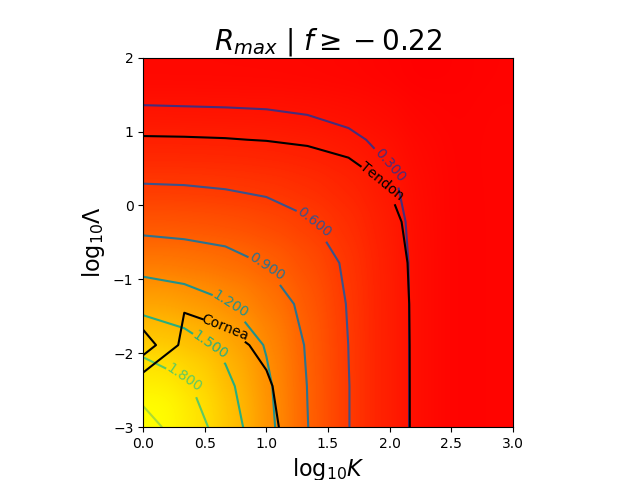

In [210]:
rmax_restricted[2,0] = (rmax_restricted[3,0]+rmax_restricted[1,0])/2
plt.imshow(rmax_restricted,cmap=cmap.autumn,origin='lower',extent=[0,3,-3,2],aspect=3/5,interpolation='gaussian')
plt.xlabel('$\log_{10} K$',fontsize=16)
plt.ylabel('$\log_{10}\Lambda$',fontsize=16)
plt.title('$R_{max}$ | $f\geq-0.22$',fontsize=20)

CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),rmax_restricted)#,[0.1,0.2,0.5,1,2,5,10,20],colors='k')
plt.clabel(CS, inline=1, fontsize=10)

CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),psirmax_restricted,[0.31],colors='k')
plt.clabel(CS,fmt='Cornea', inline=1, fontsize=10)
CS = plt.contour(np.log10(Klist),np.log10(Lambdalist),psirmax_restricted,[0.09],colors='k')
plt.clabel(CS,fmt='Tendon', inline=1, fontsize=10)

plt.show()